<a href="https://colab.research.google.com/github/rdgnoleto/-Redu-o_Dimensionalidade_img/blob/main/Detection_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lxml

In [2]:
import zipfile
import os
import random
import shutil
import xml.etree.ElementTree as ET
import yaml

In [4]:
# Caminho do arquivo zip
zip_path = '/content/dataset.zip'  # <-- Troque pelo nome do seu arquivo

# Pasta de destino
extract_path = '/content/dataset'

# Descompactar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Descompactado em:", extract_path)

Descompactado em: /content/dataset


In [5]:
# Definindo os caminhos
image_folder = '/content/dataset/images'        # Pasta com as imagens
annotation_folder = '/content/dataset/annotations'  # Pasta com os arquivos XML
labels_folder = '/content/dataset/labels'       # Pasta onde serão salvos os arquivos .txt

# Criando a pasta de labels
os.makedirs(labels_folder, exist_ok=True)

# Lista de classes
classes = ['dog', 'cat']  # Substitua pelos nomes corretos das suas classes

# Função de conversão de xlm para txt
def convert(xml_file):
    in_file = open(xml_file)
    tree = ET.parse(in_file)
    root = tree.getroot()

    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    file_name = os.path.splitext(os.path.basename(xml_file))[0]
    out_file = open(f"{labels_folder}/{file_name}.txt", 'w')

    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        xmin = float(xmlbox.find('xmin').text)
        xmax = float(xmlbox.find('xmax').text)
        ymin = float(xmlbox.find('ymin').text)
        ymax = float(xmlbox.find('ymax').text)
        x_center = (xmin + xmax) / 2.0 / w
        y_center = (ymin + ymax) / 2.0 / h
        width = (xmax - xmin) / w
        height = (ymax - ymin) / h
        out_file.write(f"{cls_id} {x_center} {y_center} {width} {height}\n")

    in_file.close()
    out_file.close()

# Loop para converter todos os XML
for xml_file in os.listdir(annotation_folder):
    if not xml_file.endswith('.xml'):
        continue
    convert(os.path.join(annotation_folder, xml_file))

print('Conversão concluída!')

Conversão concluída!


In [6]:
# Criando pastas para train, val e test
for split in ['train', 'val', 'test']:
    os.makedirs(f'/content/dataset/images/{split}', exist_ok=True)
    os.makedirs(f'/content/dataset/labels/{split}', exist_ok=True)
# Lista de todas as imagens
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Embaralhar
random.shuffle(all_images)

# Porcentagens para treino, validação e teste
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Cálculo das quantidades
train_size = int(len(all_images) * train_ratio)
val_size = int(len(all_images) * val_ratio)

# Divide os arquivos
train_files = all_images[:train_size]
val_files = all_images[train_size:train_size + val_size]
test_files = all_images[train_size + val_size:]

# Função para mover
def move_files(file_list, split):
    for file in file_list:
        # Mover imagem
        shutil.move(f'/content/dataset/images/{file}', f'/content/dataset/images/{split}/{file}')

        # Mover label
        label_file = file.rsplit('.', 1)[0] + '.txt'
        if os.path.exists(f'/content/dataset/labels/{label_file}'):
            shutil.move(f'/content/dataset/labels/{label_file}', f'/content/dataset/labels/{split}/{label_file}')

# Executar
move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print('Divisão concluída!')

Divisão concluída!


In [7]:
# Criando pasta yaml
data = {
    'train': '/content/dataset/images/train',
    'val': '/content/dataset/images/val',
    'nc': 2,
    'names': ['dog', 'cat']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file)

data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val

nc: 2
names: ['dog', 'cat']
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

print("Arquivo data.yaml criado!")

Arquivo data.yaml criado!


In [8]:
%cd /content
!mkdir -p meu_projeto_yolo
%cd meu_projeto_yolo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%cd /content/meu_projeto_yolo/yolov5
!pip install -r requirements.txt

/content
/content/meu_projeto_yolo
Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.54 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/meu_projeto_yolo/yolov5
/content/meu_projeto_yolo/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta

In [9]:
!python train.py \
--img 640 \
--batch 16 \
--epochs 50 \
--data /content/dataset/data.yaml \
--weights yolov5s.pt \
--project /content/meu_projeto_yolo/runs \
--name treino_custom \
--exist-ok

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-18 16:29:17.271442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750264157.569483    3368 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750264157.652517    3368 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [15]:
from google.colab import files
import os

uploaded = files.upload()

for filename in uploaded.keys():
    if not os.path.exists(f'/content/{filename}'):
        os.rename(filename, f'/content/{filename}')

print("Arquivos disponíveis em /content:", os.listdir('/content'))

Saving dog_cats1.jpg to dog_cats1 (1).jpg
Arquivos disponíveis em /content: ['.config', 'dataset', 'dataset.zip', 'data.yaml', 'meu_projeto_yolo', 'dog_cats1 (1).jpg', 'cat_dog4 (2).jpg', 'sample_data']


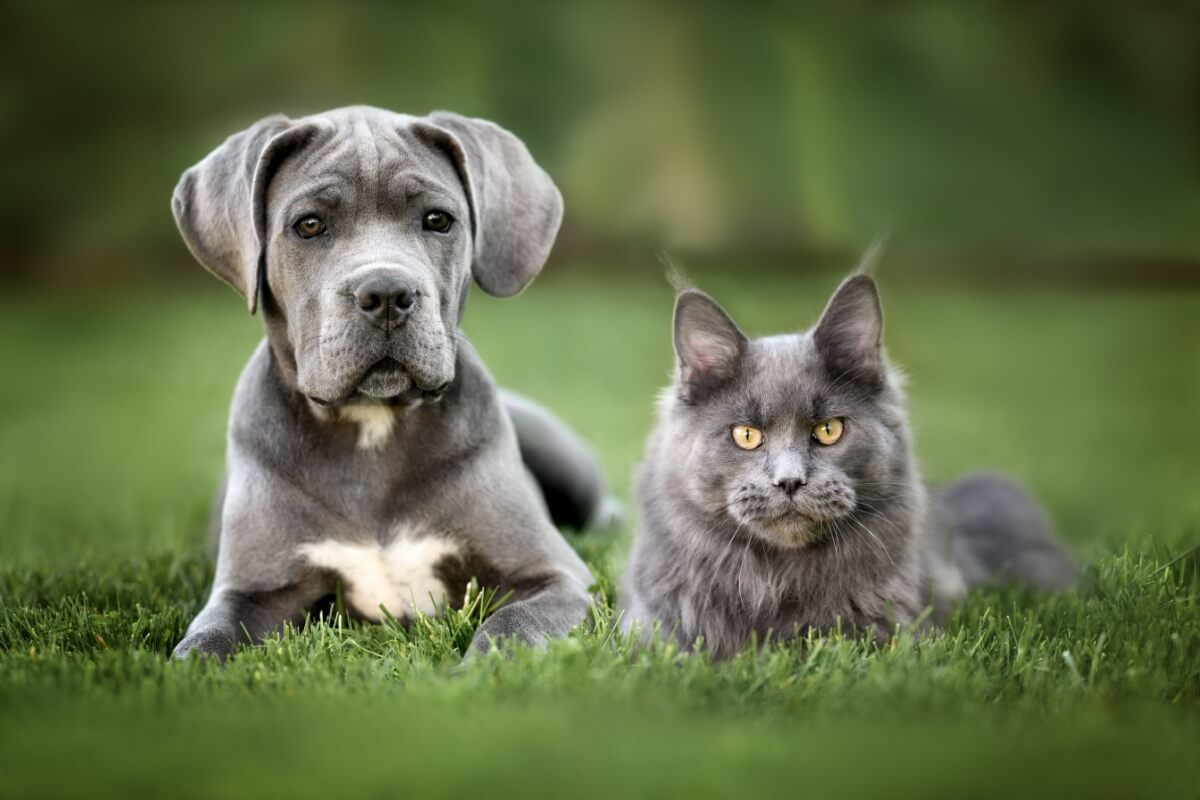

In [23]:
from IPython.display import Image, display

display(Image('/content/cat_dog4.jpg'))

In [24]:
!python detect.py --weights /content/meu_projeto_yolo/runs/treino_custom/weights/best.pt --source /content/cat_dog4.jpg --conf 0.25 --project /content/meu_projeto_yolo/runs/detect --name resultado --exist-ok

detect: weights=['/content/meu_projeto_yolo/runs/treino_custom/weights/best.pt'], source=/content/cat_dog4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/meu_projeto_yolo/runs/detect, name=resultado, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/cat_dog4.jpg: 448x640 1 dog, 1 cat, 27.9ms
Speed: 0.5ms pre-process, 27.9ms inference, 125.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/meu_projeto_yolo/runs/detect/resultado


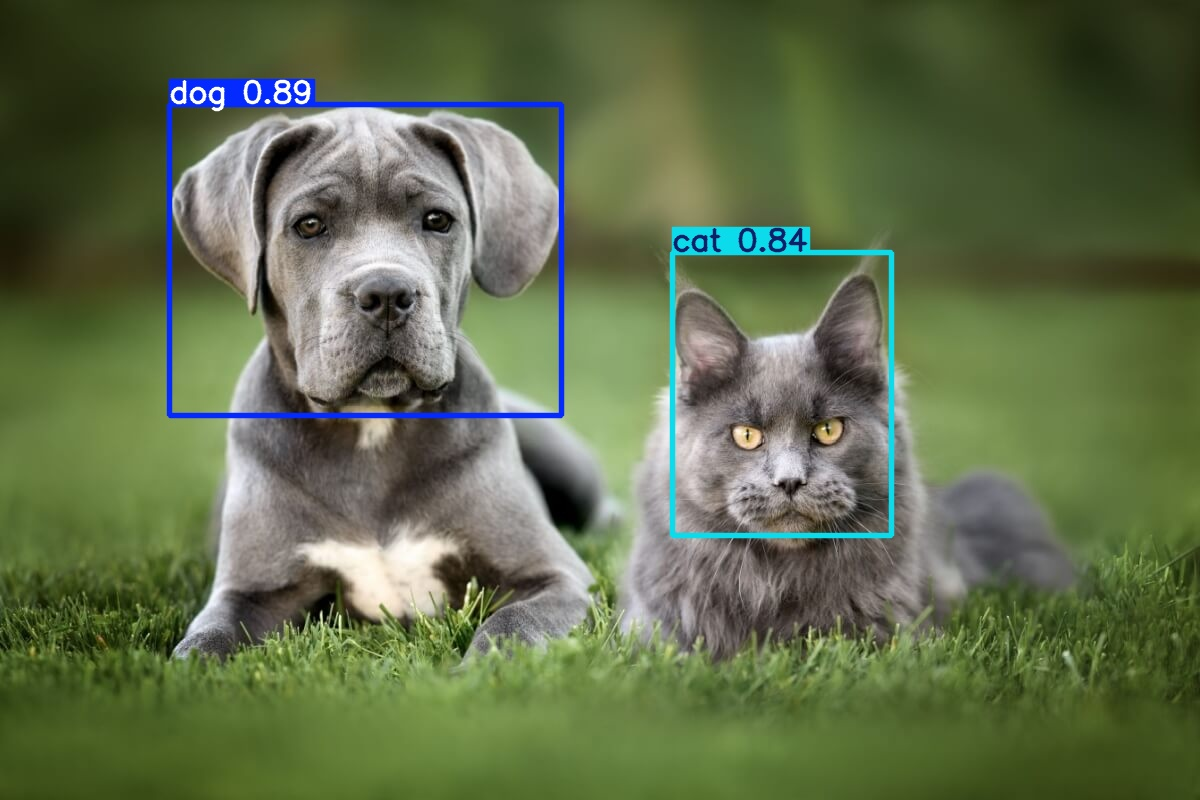

In [25]:
display(Image(filename='/content/meu_projeto_yolo/runs/detect/resultado/cat_dog4.jpg'))